In [401]:
import numpy as np
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [370]:
URL = "https://btech.com/en/moblies/mobile-phones-smartphones/smartphones.html"

In [371]:
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36', 'Accept-Language':'en-US , en;q=0.5'})   

In [372]:
# HTTP request
webpage = requests.get(URL, headers=HEADERS)

In [373]:
# webpage  >>>>> response 200
webpage.content

b'<!doctype html>\n<html lang="en">\n<head>\n<script type="dd2cb65063022114ad20558b-text/javascript">\n    var BASE_URL = \'https\\u003A\\u002F\\u002Fbtech.com\\u002Fen\\u002F\';\n    var require = {\n        \'baseUrl\': \'https\\u003A\\u002F\\u002Fbtech.com\\u002Fstatic\\u002Fversion1694661482\\u002Ffrontend\\u002FBtech\\u002FBase\\u002Fen_US\'\n    };</script> <meta charset="utf-8" /><script type="dd2cb65063022114ad20558b-text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false},ajax:{deny_list:[]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQUFV1RSCRABUllTAgQGUFc=",licenseKey:"55c695803d",applicationID:"168155163"};;/*! For license information please see nr-loader-full-1.239.1.min.js.LICENSE.txt */\n(()=>{"use strict";var e,t,r={5763:(e,t,r)=>{r.d(t,{P_:()=>h,Mt:()=>p,C5:()=>s,DL:()=>b,OP:()=>_,lF:()=>S,Yu:()=>w,Dg:()=>g,CX:()=>c,GE:()=>y,sU:()=>D});var n=r(8632),i=r(9567);const a={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,appli

In [374]:
# from bytes to html format
soup = BeautifulSoup(webpage.content, "html.parser")

### search on one page

In [375]:
links = soup.find_all('a', attrs={'class':'listingWrapperSection'})

In [376]:
links

[<a class="listingWrapperSection" href="https://btech.com/en/apple-iphone-13-128gb-4gb-blue-jap.html">
 <div class="plpThumbImg">
 <div class="coupon-plp" id="coupon-plp-265330">
 </div>
 <span class="product-image-container product-image-container-265330">
 <span class="product-image-wrapper">
 <img alt="Apple iPhone 13, 128GB, 4GB RAM, 5G - Blue (Japanese Version)" class="product-image-photo lazy" data-src="https://btech.com/cdn-cgi/image/quality=50,format=auto/media/catalog/product/cache/472383e37f6cd95ca4a09ee1de419173/e/4/e4530e80203117509528d09cecd7a2333d83c57d0de8ba29f9109e294e3cddf7.jpeg" height="300" width="240"/></span>
 </span>
 <style>.product-image-container-265330 {
     width: 240px;
 }
 .product-image-container-265330 span.product-image-wrapper {
     padding-bottom: 125%;
 }</style><script type="text/javascript">prodImageContainers = document.querySelectorAll(".product-image-container-265330");
 for (var i = 0; i < prodImageContainers.length; i++) {
     prodImageConta

In [377]:
links[0].get('href')

'https://btech.com/en/apple-iphone-13-128gb-4gb-blue-jap.html'

In [378]:
one_page = requests.get(links[0].get('href'), headers = HEADERS)

In [379]:
one_page

<Response [200]>

In [380]:
new_soup = BeautifulSoup(one_page.content, "html.parser")

In [381]:
new_soup

<!DOCTYPE html>

<html lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# product: http://ogp.me/ns/product#">
<script type="cd8ba3e8f4ca1d9fee18cd5f-text/javascript">
    var BASE_URL = 'https\u003A\u002F\u002Fbtech.com\u002Fen\u002F';
    var require = {
        'baseUrl': 'https\u003A\u002F\u002Fbtech.com\u002Fstatic\u002Fversion1694661482\u002Ffrontend\u002FBtech\u002FBase\u002Fen_US'
    };</script> <meta charset="utf-8"/><script type="cd8ba3e8f4ca1d9fee18cd5f-text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false},ajax:{deny_list:[]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQUFV1RSCRABUllTAgQGUFc=",licenseKey:"55c695803d",applicationID:"168155163"};;/*! For license information please see nr-loader-full-1.239.1.min.js.LICENSE.txt */
(()=>{"use strict";var e,t,r={5763:(e,t,r)=>{r.d(t,{P_:()=>h,Mt:()=>p,C5:()=>s,DL:()=>b,OP:()=>_,lF:()=>S,Yu:()=>w,Dg:()=>g,CX:()=>c,GE:()=>y,sU:()=>D});var n=r(8632),i=r(9567);const a={beacon:n.c

### finish one page, now create the DF

In [382]:
# extract name of phone
# new_soup.find("span" , attrs={"data-ui-id":"page-title-wrapper"}).text.strip()
new_soup.find("td" , attrs={"class":"col data model_name_val"}).text.strip()

'iPhone 13'

In [383]:
# storage
new_soup.find("td" , attrs={"class":"col data storage_capacity_val"}).text.strip().split(" ")[0]

'128'

In [384]:
# ram
new_soup.find("td" , attrs={"class":"col data ram_val"}).text.strip().split(" ")[0]

'4'

In [385]:
# front camera
new_soup.find("td" , attrs={"class":"col data front_camera_val"}).text.strip().split(" ")[0]

'12'

In [386]:
new_soup.find("td" , attrs={"class":"col data battery_capacity1_val"}).text.split(" ")[0]

'3000'

In [387]:
new_soup.find("td" , attrs={"class":"col data resolution_val"}).text

'1170 x 2532'

In [388]:
# price
new_soup.find("span" , attrs={"class":"price"}).text.split(" ")[0].replace(",","")

'31999'

In [389]:
# rate
new_soup.find("div" , attrs={"class":"top-avg-rating-count"}).text.split(" ")[0]

'4.4'

In [390]:
# inches
new_soup.find("td" , attrs={"class":"col data display_size_val"}).text.split(" ")[0]

'6.1'

In [391]:
links_list = []

In [392]:
# Loop for extracting links from Tag Objects
for link in links:
    links_list.append(link.get('href'))

In [393]:
d = {"title":[], "storage":[],"Ram":[],"Front Camera":[],"Battery":[], "Resolutions":[],"Rating":[],"Inches":[],"price in EGY":[]}

In [394]:
def get_title(soup):
    try:
        title = new_soup.find("td" , attrs={"class":"col data model_name_val"}).text.strip()
    except AttributeError:
        title = "none"
    return title

In [395]:
def get_price(soup):

    try:
        price = new_soup.find("span" , attrs={"class":"price"}).text.split(" ")[0].replace(",","")
    except:
        price = ""

    return price

def get_storage(soup):

    try:
        storage = new_soup.find("td" , attrs={"class":"col data storage_capacity_val"}).text.strip().split(" ")[0]
        
    except:
        storage = ""

    return storage

In [396]:
def get_ram(soup):
    try:
        ram = new_soup.find("td" , attrs={"class":"col data ram_val"}).text.strip().split(" ")[0]
    except:
        ram = ""
    return ram

def get_FrontCamera(soup):
    try:
        FrontCamera = new_soup.find("td" , attrs={"class":"col data front_camera_val"}).text.strip().split(" ")[0]
    except:
        FrontCamera = ""
    return FrontCamera

def get_Battery(soup):
    try:
        Battery = new_soup.find("td" , attrs={"class":"col data battery_capacity1_val"}).text.split(" ")[0]
    except:
        Battery = ""
    return Battery

def get_Resolutions(soup):
    try:
        Resolutions = new_soup.find("td" , attrs={"class":"col data resolution_val"}).text
    except:
        Resolutions = ""
    return Resolutions

def get_Rating(soup):
    try:
        Rating = new_soup.find("div" , attrs={"class":"top-avg-rating-count"}).text.split(" ")[0]
    except:
        Rating = ""
    return Rating

def get_Inches(soup):
    try:
        Inches = new_soup.find("td" , attrs={"class":"col data display_size_val"}).text.split(" ")[0]
    except:
        Inches = ""
    return Inches


In [397]:
for link in links_list:
        new_webpage = requests.get(link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['storage'].append(get_storage(new_soup))
        d['Front Camera'].append(get_FrontCamera(new_soup))
        d['Battery'].append(get_Battery(new_soup))
        d['Resolutions'].append(get_Resolutions(new_soup))
        d['Rating'].append(get_Rating(new_soup))
        d['Inches'].append(get_Inches(new_soup))
        d['price in EGY'].append(get_price(new_soup))
        d['Ram'].append(get_ram(new_soup))

In [398]:
phone_df = pd.DataFrame.from_dict(d)
phone_df['Rating'].replace('', np.nan, inplace=True)
phone_df.to_csv("phone_data.csv", header=True, index=False)

In [399]:
phone_df

,title,storage,Ram,Front Camera,Battery,Resolutions,Rating,Inches,price in EGY
0,iPhone 13,128,4,12,3000,1170 x 2532,4.4,6.1,31999
1,Galaxy A14,64,4,8,4000,1080 x 2400,NaN,6.6,5540
2,Y27,128,6,8,4000,1080 x 2388,NaN,6.6,7790
3,Galaxy A24,128,4,13,4000,1080 x 2340,NaN,6.5,7099
4,Galaxy A14,128,4,13,4000,1080 x 2408,NaN,6.6,5899
5,iPhone 13,128,4,12,3000,1170 x 2532,4.4,6.1,31999
6,iphone 14,128,6,12,3000,1170x2532,NaN,6.1,35549
7,Y27,128,6,8,4000,1080 x 2388,NaN,6.6,7790
8,Galaxy A24,128,6,13,4000,1080 x 2340,NaN,6.5,8099
9,Galaxy A24,128,8,13,4000,1080 x 2340,NaN,6.5,8699


<Axes: xlabel='title', ylabel='price in EGY'>

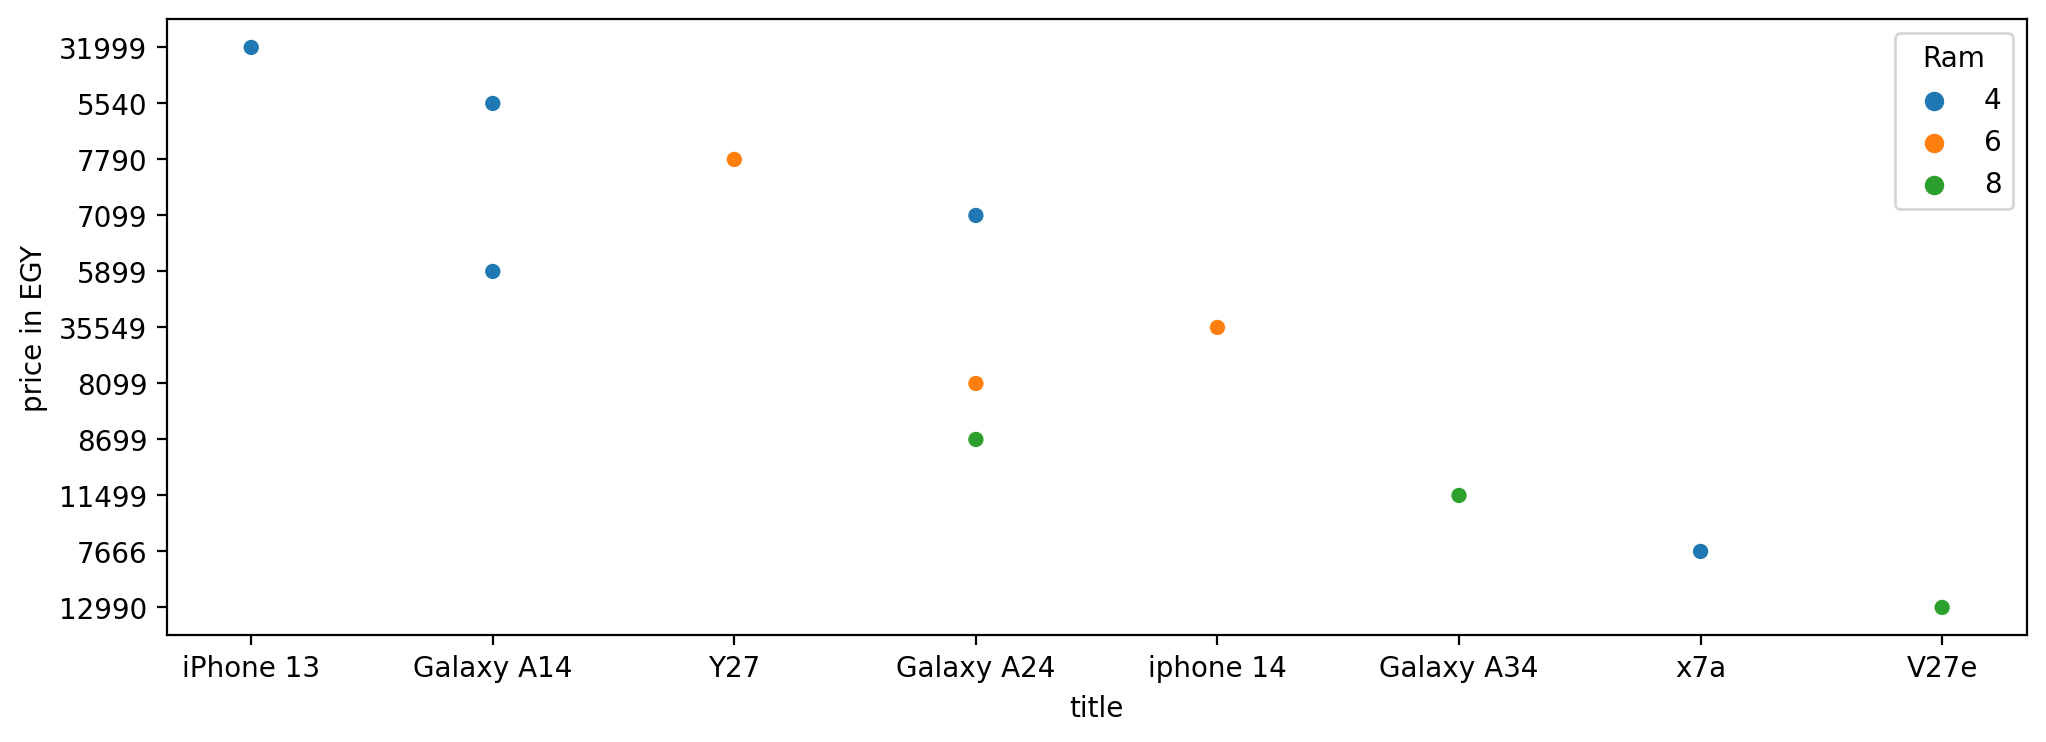

In [404]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=phone_df,x='title',y='price in EGY',hue="Ram")